### Loading libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [13]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

print('--------------Train data info------------')
train.info()
print('\n--------------Test data info------------')
test.info()

--------------Train data info------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

--------------Test data info------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418

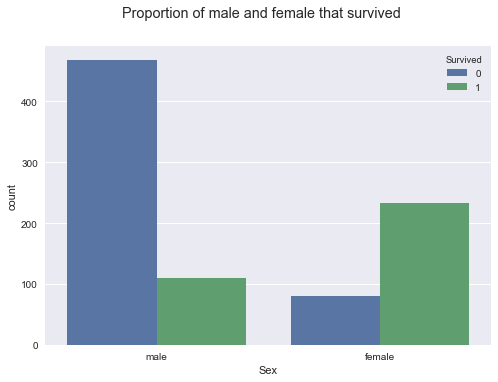

In [3]:
plt.figure()
plt.suptitle('Proportion of male and female that survived')
g = sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

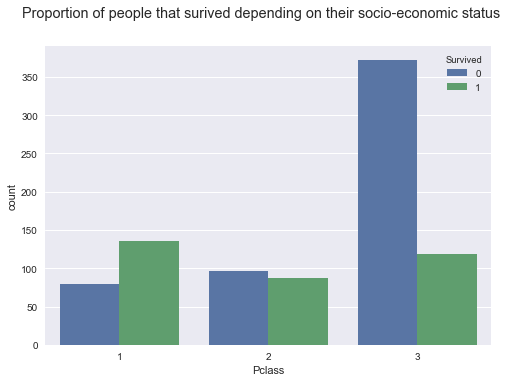

In [6]:
plt.figure()
plt.suptitle('Proportion of people that surived depending on their socio-economic status')
g = sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()

## Model Building

### Useful functions 

In [27]:
def label_encoding(dataframe, labels):
    """
    Encode catrgorical variable into numerical values
    """
    le = LabelEncoder()
    for label in labels:
        le.fit(dataframe[label])
        dataframe[label] = le.transform(dataframe[label])
        
    return dataframe

def normalize_features(x_train):
    """
    Normalize the features by subtracting the mean and dividing by the standard deviation
    """
    for features in x_train:
        feats = x_train[features].tolist()
        mean = np.mean(feats)
        std = np.std(feats)
        feats = (feats - mean)/std
        x_train[features] = feats
        
    return x_train

def clean_training_data(train):
    """
    Clean the data by preprocessing the nan values and normalizing the features
    """
    
    train['Cabin'] = train['Cabin'].fillna('C0')
    train['Embarked'] = train['Embarked'].fillna('0')
    train['Age'] = train['Age'].fillna(train['Age'].mean())
    train = label_encoding(train, ['Sex', 'Ticket', 'Cabin', 'Embarked'])
    
    x_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
    y_train = train['Survived']
    
    normalize_features(x_train)
    
    return x_train.as_matrix(), y_train.as_matrix()

def clean_testing_data(test):
    
    test['Cabin'] = test['Cabin'].fillna('C0')
    test['Embarked'] = test['Embarked'].fillna('0')
    test['Age'] = test['Age'].fillna(test['Age'].mean())
    test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
    test = label_encoding(test, ['Sex', 'Ticket', 'Cabin', 'Embarked'])

    x_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
    
    normalize_features(x_test)

    return x_test.as_matrix(), test['PassengerId']

### Logistic Regression training

In [28]:
x_train, y_train = clean_training_data(train)
x_test, y_test = clean_testing_data(test)

# Hyperparameters initialization
lr = 0.05

# Parameters initialization
weights = np.random.normal(0, 0.1, 9)
biais = random.normalvariate(0, 0.1)

m = x_train.shape[0]
for epoch in range(300):
    
    # Forward pass
    z = np.dot(x_train, weights) + biais
    a = 1/(1 + np.exp(-z))
    
    # Loss computation
    j = np.sum(-(y_train * np.log(a) + (1 - y_train) * np.log(1 - a)))/m
    
    # Gradient computation
    dz = a - y_train
    dw = np.dot(dz, x_train)/m
    db = np.sum(dz)/m
    
    # Update weights
    weights = weights - lr * dw
    biais = biais - lr * db
    
    if epoch % 10 == 0:
        print('epoch %s - loss %s' % (epoch, j))
        
    

epoch 0 - loss 0.694080766094
epoch 10 - loss 0.625538841183
epoch 20 - loss 0.579817683104
epoch 30 - loss 0.548390239014
epoch 40 - loss 0.526024049511
epoch 50 - loss 0.509576351134
epoch 60 - loss 0.497128346688
epoch 70 - loss 0.487473537068
epoch 80 - loss 0.479828306105
epoch 90 - loss 0.473667421599
epoch 100 - loss 0.468628435288
epoch 110 - loss 0.464454549677
epoch 120 - loss 0.460959470495
epoch 130 - loss 0.458005169608
epoch 140 - loss 0.455487440352
epoch 150 - loss 0.453326282491
epoch 160 - loss 0.451459356229
epoch 170 - loss 0.449837432487
epoch 180 - loss 0.448421170017
epoch 190 - loss 0.447178792247
epoch 200 - loss 0.446084385626
epoch 210 - loss 0.445116634733
epoch 220 - loss 0.444257869214
epoch 230 - loss 0.443493336673
epoch 240 - loss 0.442810641545
epoch 250 - loss 0.442199307458
epoch 260 - loss 0.44165043256
epoch 270 - loss 0.441156415612
epoch 280 - loss 0.440710736506
epoch 290 - loss 0.440307779029


### Logistic Regression prediction

In [29]:
x_test, PassengerId = clean_testing_data(test)

preds = []
for feats in x_test:
    z = np.dot(feats, weights) + biais
    a = 1/(1 + np.exp(-z))
    
    if a > 0.5:
        preds.append(1)
    elif a <= 0.5:
        preds.append(0)
        
sample_ids = np.random.choice(PassengerId, 10)

for id, value in enumerate(sample_ids):
    print('Passenger id: %s - Survived: %s' % (value, preds[id]))

Passenger id: 1110 - Survived: 0
Passenger id: 1309 - Survived: 0
Passenger id: 1007 - Survived: 0
Passenger id: 942 - Survived: 0
Passenger id: 926 - Survived: 1
Passenger id: 1008 - Survived: 0
Passenger id: 1243 - Survived: 1
Passenger id: 900 - Survived: 0
Passenger id: 1056 - Survived: 1
Passenger id: 1074 - Survived: 0


In [30]:
result = pd.DataFrame({
    'PassengerId': PassengerId,
    'Survived': preds
})
result.to_csv('Output/Logistic Regression.csv', index=False)